# **Público recebido nos equipamentos culturais públicos**

O presente projeto busca obter uma visão mais abrangente sobre o público que
frequenta os equipamentos culturais do município de Recife.

## **Dicionário de dados**

## **Importação das bibliotecas**

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

## **Carregamento dos dados**

In [2]:
DATAPATH = './data'

In [3]:
df = pd.read_csv(f'{DATAPATH}/atendimento_secult.csv', sep=';')
gdf = gpd.read_file(f'{DATAPATH}/bairros.geojson')

## **Exploração e tratamento dos dados**

In [4]:
df.head()

,Ano,Tipo,Equipamento,Bairro,Janeiro,Fevereiro,Marco,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Obs
0,2023,Museu,Casa do Carnaval,Sao Jose,321,172.0,222.0,240,317,206,255.0,194.0,180.0,176,142,44,NaN
1,2023,Museu,Centro de Design do Recife,Sao Jose,35,100.0,124.0,139,127,130,89.0,98.0,106.0,128,120,93,NaN
2,2023,Museu,Galeria Janete Costa,Boa Viagem,242,NaN,NaN,1099,180,297,401.0,434.0,566.0,1464,715,273,em manutenção em fevereiro/março
3,2023,Museu,MAMAM (Museu de Arte Moderna Aloisio Magalhaes),Boa Vista,523,161.0,599.0,1196,1429,902,NaN,600.0,1320.0,24,737,414,Em manutenção em julho
4,2023,Museu,MAP (Museu de Arte Popular),Sao Jose,127,55.0,220.0,135,103,128,104.0,101.0,135.0,129,141,79,NaN


In [5]:
gdf.head()

,OBJECTID,CBAIRRCODI,VBAIRROID,EBAIRRNOME,CRPAAACODI,CMICROCODI,TBAIRRULAT,CEMPRECODI,AUSUACMATR,EBAIRRNOMEOF,EBAIRRLINK,TBAIRRSULAT,DB2GSE.ST_Area(SHAPE),DB2GSE.SdeLength(SHAPE),geometry
0,1,752,None,CURADO,5,3,2019-10-15 21:00:00,None,None,Curado,None,None,8.255774e+06,18101.174156,"MULTIPOLYGON (((-34.9712 -8.08154, -34.9712 -8..."
1,2,396,None,DOIS UNIDOS,2,3,2019-10-15 21:00:00,None,None,Dois Unidos,None,None,3.118840e+06,8101.114056,"MULTIPOLYGON (((-34.91022 -7.99242, -34.9102 -..."
2,3,132,None,AFLITOS,3,1,2019-10-15 21:00:00,None,None,Aflitos,None,None,3.074612e+05,2417.227267,"MULTIPOLYGON (((-34.89256 -8.0399, -34.89248 -..."
3,4,906,None,SANCHO,5,3,2019-10-15 21:00:00,None,None,Sancho,None,None,6.324592e+05,3188.997249,"MULTIPOLYGON (((-34.96576 -8.08146, -34.96576 ..."
4,5,736,None,VARZEA,4,3,2019-10-15 21:00:00,None,None,Várzea,None,None,2.239116e+07,27311.242636,"MULTIPOLYGON (((-34.96607 -8.02122, -34.96604 ..."


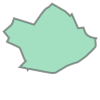

In [6]:
gdf.loc[gdf['EBAIRRNOME'] == 'PARNAMIRIM']['geometry'].values[0]

In [7]:
gdf.iloc[0]['EBAIRRNOME']

'CURADO'

In [8]:
gdf.index[gdf['EBAIRRNOME'] == 'Curado'.upper()][0]

np.int64(0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ano          15 non-null     int64  
 1   Tipo         15 non-null     object 
 2   Equipamento  15 non-null     object 
 3   Bairro       15 non-null     object 
 4   Janeiro      15 non-null     int64  
 5   Fevereiro    14 non-null     float64
 6   Marco        14 non-null     float64
 7   Abril        15 non-null     int64  
 8   Maio         15 non-null     int64  
 9   Junho        15 non-null     int64  
 10  Julho        14 non-null     float64
 11  Agosto       14 non-null     float64
 12  Setembro     14 non-null     float64
 13  Outubro      15 non-null     int64  
 14  Novembro     15 non-null     int64  
 15  Dezembro     15 non-null     int64  
 16  Obs          3 non-null      object 
dtypes: float64(5), int64(8), object(4)
memory usage: 2.1+ KB


In [10]:
for col in df.columns:
  if df[col].dtype != 'object':
    df[col] = df[col].fillna(0).astype('int16')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Ano          15 non-null     int16 
 1   Tipo         15 non-null     object
 2   Equipamento  15 non-null     object
 3   Bairro       15 non-null     object
 4   Janeiro      15 non-null     int16 
 5   Fevereiro    15 non-null     int16 
 6   Marco        15 non-null     int16 
 7   Abril        15 non-null     int16 
 8   Maio         15 non-null     int16 
 9   Junho        15 non-null     int16 
 10  Julho        15 non-null     int16 
 11  Agosto       15 non-null     int16 
 12  Setembro     15 non-null     int16 
 13  Outubro      15 non-null     int16 
 14  Novembro     15 non-null     int16 
 15  Dezembro     15 non-null     int16 
 16  Obs          3 non-null      object
dtypes: int16(13), object(4)
memory usage: 998.0+ bytes


In [12]:
df.head()

,Ano,Tipo,Equipamento,Bairro,Janeiro,Fevereiro,Marco,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Obs
0,2023,Museu,Casa do Carnaval,Sao Jose,321,172,222,240,317,206,255,194,180,176,142,44,NaN
1,2023,Museu,Centro de Design do Recife,Sao Jose,35,100,124,139,127,130,89,98,106,128,120,93,NaN
2,2023,Museu,Galeria Janete Costa,Boa Viagem,242,0,0,1099,180,297,401,434,566,1464,715,273,em manutenção em fevereiro/março
3,2023,Museu,MAMAM (Museu de Arte Moderna Aloisio Magalhaes),Boa Vista,523,161,599,1196,1429,902,0,600,1320,24,737,414,Em manutenção em julho
4,2023,Museu,MAP (Museu de Arte Popular),Sao Jose,127,55,220,135,103,128,104,101,135,129,141,79,NaN


In [13]:
df['Equipamento'] = df['Equipamento'].apply(
                        lambda x: x.split(' ', maxsplit=1)[-1][1:-1]
                        if x.endswith(')') else x)

In [14]:
df.head()

,Ano,Tipo,Equipamento,Bairro,Janeiro,Fevereiro,Marco,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Obs
0,2023,Museu,Casa do Carnaval,Sao Jose,321,172,222,240,317,206,255,194,180,176,142,44,NaN
1,2023,Museu,Centro de Design do Recife,Sao Jose,35,100,124,139,127,130,89,98,106,128,120,93,NaN
2,2023,Museu,Galeria Janete Costa,Boa Viagem,242,0,0,1099,180,297,401,434,566,1464,715,273,em manutenção em fevereiro/março
3,2023,Museu,Museu de Arte Moderna Aloisio Magalhaes,Boa Vista,523,161,599,1196,1429,902,0,600,1320,24,737,414,Em manutenção em julho
4,2023,Museu,Museu de Arte Popular,Sao Jose,127,55,220,135,103,128,104,101,135,129,141,79,NaN


In [15]:
for column in df.columns:
  if df[column].dtype == 'object':
    df[column] = df[column].astype(pd.StringDtype(storage='pyarrow'))

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Ano          15 non-null     int16 
 1   Tipo         15 non-null     string
 2   Equipamento  15 non-null     string
 3   Bairro       15 non-null     string
 4   Janeiro      15 non-null     int16 
 5   Fevereiro    15 non-null     int16 
 6   Marco        15 non-null     int16 
 7   Abril        15 non-null     int16 
 8   Maio         15 non-null     int16 
 9   Junho        15 non-null     int16 
 10  Julho        15 non-null     int16 
 11  Agosto       15 non-null     int16 
 12  Setembro     15 non-null     int16 
 13  Outubro      15 non-null     int16 
 14  Novembro     15 non-null     int16 
 15  Dezembro     15 non-null     int16 
 16  Obs          3 non-null      string
dtypes: int16(13), string(4)
memory usage: 1.6 KB


## **Análise dos dados**

### **Quantidade de museus nos bairros do Recife**

In [17]:
cult_gdf = gpd.GeoDataFrame({'Tipo': df['Tipo'],
                             'Bairro': df['Bairro'].apply(lambda x: x.strip()),
                             'Geometry': [gdf.loc[gdf['EBAIRRNOME'] == y.upper()]['geometry'].values[0] for y in df['Bairro']]})

In [18]:
cult_gdf.head()

,Tipo,Bairro,Geometry
0,Museu,Sao Jose,MULTIPOLYGON (((-34.874815078753905 -8.0665159...
1,Museu,Sao Jose,MULTIPOLYGON (((-34.874815078753905 -8.0665159...
2,Museu,Boa Viagem,MULTIPOLYGON (((-34.917949532757795 -8.1431870...
3,Museu,Boa Vista,MULTIPOLYGON (((-34.88990531378399 -8.04694142...
4,Museu,Sao Jose,MULTIPOLYGON (((-34.874815078753905 -8.0665159...


In [19]:
cult_gdf.loc[cult_gdf['Tipo'] == 'Museu']['Geometry'].value_counts().reset_index()

,Geometry,count
0,MULTIPOLYGON (((-34.874815078753905 -8.0665159...,5
1,MULTIPOLYGON (((-34.917949532757795 -8.1431870...,1
2,MULTIPOLYGON (((-34.88990531378399 -8.04694142...,1
3,MULTIPOLYGON (((-34.90897830434088 -8.03109186...,1
4,MULTIPOLYGON (((-34.86836686592692 -8.06483853...,1


In [20]:
bairro_gdf = gpd.GeoDataFrame(cult_gdf.loc[cult_gdf['Tipo'] == 'Museu']['Geometry'].value_counts().reset_index(), crs="EPSG:4326", geometry='Geometry')

In [21]:
bairr_count_df = cult_gdf.loc[cult_gdf['Tipo'] == 'Museu']['Bairro'].value_counts().reset_index()

In [22]:
list(bairr_count_df.index)

[0, 1, 2, 3, 4]

In [23]:
bairr_count_df

,Bairro,count
0,Sao Jose,5
1,Boa Viagem,1
2,Boa Vista,1
3,Parnamirim,1
4,Recife,1


In [24]:
bairro_gdf = bairro_gdf.merge(right=bairr_count_df, how='inner', left_index=True, right_index=True).drop(columns='count_x').rename(columns={'count_y': 'count'})

In [25]:
type(bairro_gdf)

geopandas.geodataframe.GeoDataFrame

In [26]:
bairro_gdf

,Geometry,Bairro,count
0,"MULTIPOLYGON (((-34.87482 -8.06652, -34.87418 ...",Sao Jose,5
1,"MULTIPOLYGON (((-34.91795 -8.14319, -34.91776 ...",Boa Viagem,1
2,"MULTIPOLYGON (((-34.88991 -8.04694, -34.88987 ...",Boa Vista,1
3,"MULTIPOLYGON (((-34.90898 -8.03109, -34.90881 ...",Parnamirim,1
4,"MULTIPOLYGON (((-34.86837 -8.06484, -34.86972 ...",Recife,1


In [27]:
aux1 = bairr_count_df.join(bairro_gdf, how='inner', lsuffix='Geometry').drop(columns='countGeometry')

In [28]:
type(aux1)

pandas.core.frame.DataFrame

In [29]:
aux1

,BairroGeometry,Geometry,Bairro,count
0,Sao Jose,"MULTIPOLYGON (((-34.87482 -8.06652, -34.87418 ...",Sao Jose,5
1,Boa Viagem,"MULTIPOLYGON (((-34.91795 -8.14319, -34.91776 ...",Boa Viagem,1
2,Boa Vista,"MULTIPOLYGON (((-34.88991 -8.04694, -34.88987 ...",Boa Vista,1
3,Parnamirim,"MULTIPOLYGON (((-34.90898 -8.03109, -34.90881 ...",Parnamirim,1
4,Recife,"MULTIPOLYGON (((-34.86837 -8.06484, -34.86972 ...",Recife,1


### **Quantidade de teatros nos bairros do Recife**

In [30]:
cult_gdf.loc[cult_gdf['Tipo'] == 'Teatro']['Bairro'].value_counts().reset_index()

,Bairro,count
0,Recife,2
1,Pina,1
2,Santo Antonio,1
3,Boa Vista,1
4,Boa Viagem,1


In [31]:
teatro_gdf = gpd.GeoDataFrame(cult_gdf.loc[cult_gdf['Tipo'] == 'Teatro']['Geometry'].value_counts().reset_index(), crs='EPSG:4326', geometry='Geometry')

In [32]:
type(teatro_gdf)

geopandas.geodataframe.GeoDataFrame

In [33]:
teatro_gdf = teatro_gdf.merge(right=cult_gdf.loc[cult_gdf['Tipo'] == 'Teatro']['Bairro'].value_counts().reset_index(), left_index=True, right_index=True).drop(columns='count_x').rename(columns={'count_y': 'count'})

In [34]:
teatro_gdf

,Geometry,Bairro,count
0,"MULTIPOLYGON (((-34.86837 -8.06484, -34.86972 ...",Recife,2
1,"MULTIPOLYGON (((-34.88369 -8.07809, -34.88201 ...",Pina,1
2,"MULTIPOLYGON (((-34.87408 -8.0595, -34.87404 -...",Santo Antonio,1
3,"MULTIPOLYGON (((-34.88991 -8.04694, -34.88987 ...",Boa Vista,1
4,"MULTIPOLYGON (((-34.91795 -8.14319, -34.91776 ...",Boa Viagem,1


### **Quantidade total de público nos museus do Recife**

In [68]:
total_pub_museus = df.loc[df['Tipo'] == 'Museu']
total_pub_museus.head()

,Ano,Tipo,Equipamento,Bairro,Janeiro,Fevereiro,Marco,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Obs
0,2023,Museu,Casa do Carnaval,Sao Jose,321,172,222,240,317,206,255,194,180,176,142,44,<NA>
1,2023,Museu,Centro de Design do Recife,Sao Jose,35,100,124,139,127,130,89,98,106,128,120,93,<NA>
2,2023,Museu,Galeria Janete Costa,Boa Viagem,242,0,0,1099,180,297,401,434,566,1464,715,273,em manutenção em fevereiro/março
3,2023,Museu,Museu de Arte Moderna Aloisio Magalhaes,Boa Vista,523,161,599,1196,1429,902,0,600,1320,24,737,414,Em manutenção em julho
4,2023,Museu,Museu de Arte Popular,Sao Jose,127,55,220,135,103,128,104,101,135,129,141,79,<NA>


In [70]:
meses_columns = [mes[:3] for mes in total_pub_museus.columns[4:-1]]

In [37]:
meses_columns

['Jan',
 'Fev',
 'Mar',
 'Abr',
 'Mai',
 'Jun',
 'Jul',
 'Ago',
 'Set',
 'Out',
 'Nov',
 'Dez']

In [75]:
sum_pub_museus = [int(total_pub_museus[col].sum()) for col in total_pub_museus.columns[4:-1]]

In [76]:
sum_pub_museus

[21141,
 9032,
 13894,
 14034,
 12485,
 11777,
 14446,
 12333,
 30457,
 18249,
 16334,
 11069]

### **Ranking de audiência nos museus por equipamento**

In [40]:
rank_museus = df.loc[df['Tipo'] == 'Museu'].drop(columns=['Ano', 'Tipo', 'Obs', 'Bairro'])
rank_museus

,Equipamento,Janeiro,Fevereiro,Marco,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro
0,Casa do Carnaval,321,172,222,240,317,206,255,194,180,176,142,44
1,Centro de Design do Recife,35,100,124,139,127,130,89,98,106,128,120,93
2,Galeria Janete Costa,242,0,0,1099,180,297,401,434,566,1464,715,273
3,Museu de Arte Moderna Aloisio Magalhaes,523,161,599,1196,1429,902,0,600,1320,24,737,414
4,Museu de Arte Popular,127,55,220,135,103,128,104,101,135,129,141,79
5,Memorial Chico Science,265,90,264,218,110,115,187,199,212,190,146,132
6,Memorial Luiz Gonzaga,381,160,201,120,90,93,115,146,175,246,195,192
7,Museu Murillo la Greca,290,120,560,180,490,190,610,530,380,380,280,170
8,Paco do Frevo,18957,8174,11704,10707,9639,9716,12685,10031,27383,15512,13858,9672


In [77]:
rank_museus['Total'] = rank_museus[rank_museus.columns[2:]].sum(axis=1)

In [78]:
rank_df = rank_museus.sort_values(by='Total', ascending=True).reset_index(drop=True)

In [79]:
rank_df

,Equipamento,Janeiro,Fevereiro,Marco,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Total
0,Centro de Design do Recife,35,100,124,139,127,130,89,98,106,128,120,93,2508
1,Museu de Arte Popular,127,55,220,135,103,128,104,101,135,129,141,79,2660
2,Memorial Luiz Gonzaga,381,160,201,120,90,93,115,146,175,246,195,192,3466
3,Memorial Chico Science,265,90,264,218,110,115,187,199,212,190,146,132,3726
4,Casa do Carnaval,321,172,222,240,317,206,255,194,180,176,142,44,4296
5,Museu Murillo la Greca,290,120,560,180,490,190,610,530,380,380,280,170,7780
6,Galeria Janete Costa,242,0,0,1099,180,297,401,434,566,1464,715,273,10858
7,Museu de Arte Moderna Aloisio Magalhaes,523,161,599,1196,1429,902,0,600,1320,24,737,414,14764
8,Paco do Frevo,18957,8174,11704,10707,9639,9716,12685,10031,27383,15512,13858,9672,278162


### **Ranking de audiência nos museus por bairro**

In [80]:
pub_bairro = df.loc[df['Tipo'] == 'Museu'].drop(columns=['Equipamento', 'Tipo', 'Ano', 'Obs'])

In [81]:
pub_bairro

,Bairro,Janeiro,Fevereiro,Marco,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro
0,Sao Jose,321,172,222,240,317,206,255,194,180,176,142,44
1,Sao Jose,35,100,124,139,127,130,89,98,106,128,120,93
2,Boa Viagem,242,0,0,1099,180,297,401,434,566,1464,715,273
3,Boa Vista,523,161,599,1196,1429,902,0,600,1320,24,737,414
4,Sao Jose,127,55,220,135,103,128,104,101,135,129,141,79
5,Sao Jose,265,90,264,218,110,115,187,199,212,190,146,132
6,Sao Jose,381,160,201,120,90,93,115,146,175,246,195,192
7,Parnamirim,290,120,560,180,490,190,610,530,380,380,280,170
8,Recife,18957,8174,11704,10707,9639,9716,12685,10031,27383,15512,13858,9672


In [82]:
pub_bairro['Total'] = pub_bairro[pub_bairro.columns[1:]].sum(axis=1)

In [83]:
rank_pub_bairro = pub_bairro.groupby(by='Bairro', sort=False, as_index=False).sum().sort_values(by='Total')

In [84]:
rank_pub_bairro

,Bairro,Janeiro,Fevereiro,Marco,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Total
3,Parnamirim,290,120,560,180,490,190,610,530,380,380,280,170,4180
1,Boa Viagem,242,0,0,1099,180,297,401,434,566,1464,715,273,5671
2,Boa Vista,523,161,599,1196,1429,902,0,600,1320,24,737,414,7905
0,Sao Jose,1129,577,1031,852,747,672,750,738,808,869,744,540,9457
4,Recife,18957,8174,11704,10707,9639,9716,12685,10031,27383,15512,13858,9672,158038


### **Ranking de público nos teatros por equipamento**

In [49]:
pub_teatro = df.loc[df['Tipo'] == 'Teatro'].drop(columns=['Ano' , 'Tipo', 'Obs', 'Bairro'])

In [50]:
pub_teatro['Total'] = pub_teatro[pub_teatro.columns[1:]].sum(axis=1)

In [51]:
rank_pub_teatro = pub_teatro.sort_values(by='Total')

In [52]:
rank_pub_teatro

,Equipamento,Janeiro,Fevereiro,Marco,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Total
13,Teatro Hermilo Borba Filho,949,208,1351,430,696,792,853,0,0,3300,761,287,9627
9,Tearro Apolo,1473,104,514,1372,1361,706,416,862,2361,3203,1624,2131,16127
10,Teatro Barreto Junior,2714,1288,4789,3099,6069,3801,3282,4292,2950,3172,3457,6240,45153
11,Teatro de Santa Isabel,3039,467,6005,4453,6842,3810,6113,6934,5654,5918,6622,3889,59746
14,Teatro Luiz Mendonca,251,576,0,1553,6352,7855,6101,6813,6154,4075,11318,10952,62000
12,Teatro do Parque,4265,2217,8027,5142,4628,4552,4915,10190,10753,7969,7647,7067,77372


### **Ranking de público nos teatros por bairro**

In [53]:
pub_teatro_bairro = df.loc[df['Tipo'] == 'Teatro'].drop(columns=['Equipamento', 'Tipo', 'Ano', 'Obs'])

In [54]:
pub_teatro_bairro['Total'] = pub_teatro_bairro[pub_teatro_bairro.columns[1:]].sum(axis=1)

In [55]:
rank_pub_teatro_bairro = pub_teatro_bairro.groupby(by='Bairro', sort=False, as_index=False).sum().sort_values(by='Total')

In [56]:
rank_pub_teatro_bairro

,Bairro,Janeiro,Fevereiro,Marco,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Total
0,Recife,2422,312,1865,1802,2057,1498,1269,862,2361,6503,2385,2418,25754
1,Pina,2714,1288,4789,3099,6069,3801,3282,4292,2950,3172,3457,6240,45153
2,Santo Antonio,3039,467,6005,4453,6842,3810,6113,6934,5654,5918,6622,3889,59746
4,Boa Viagem,251,576,0,1553,6352,7855,6101,6813,6154,4075,11318,10952,62000
3,Boa Vista,4265,2217,8027,5142,4628,4552,4915,10190,10753,7969,7647,7067,77372


### **Quantidade total de público nos teatros do Recife**

In [57]:
sum_pub_teatro = [pub_teatro[mes].sum() for mes in pub_teatro.columns[1:-1]]

### **Percentual de pessoas nos equipamentos culturais públicos de Recife**

In [58]:
total_pub_museus = sum(sum_pub_museus)
total_pub_teatros = sum(sum_pub_teatro)
total_pessoas = total_pub_museus + total_pub_teatros
perc_pub_equip = [round((total_pub_museus / total_pessoas) * 100, 2), round((total_pub_teatros / total_pessoas) * 100, 2)]

## **Visualização dos dados**

### **Distribuição geográfica dos museus e teatros na cidade do Recife**

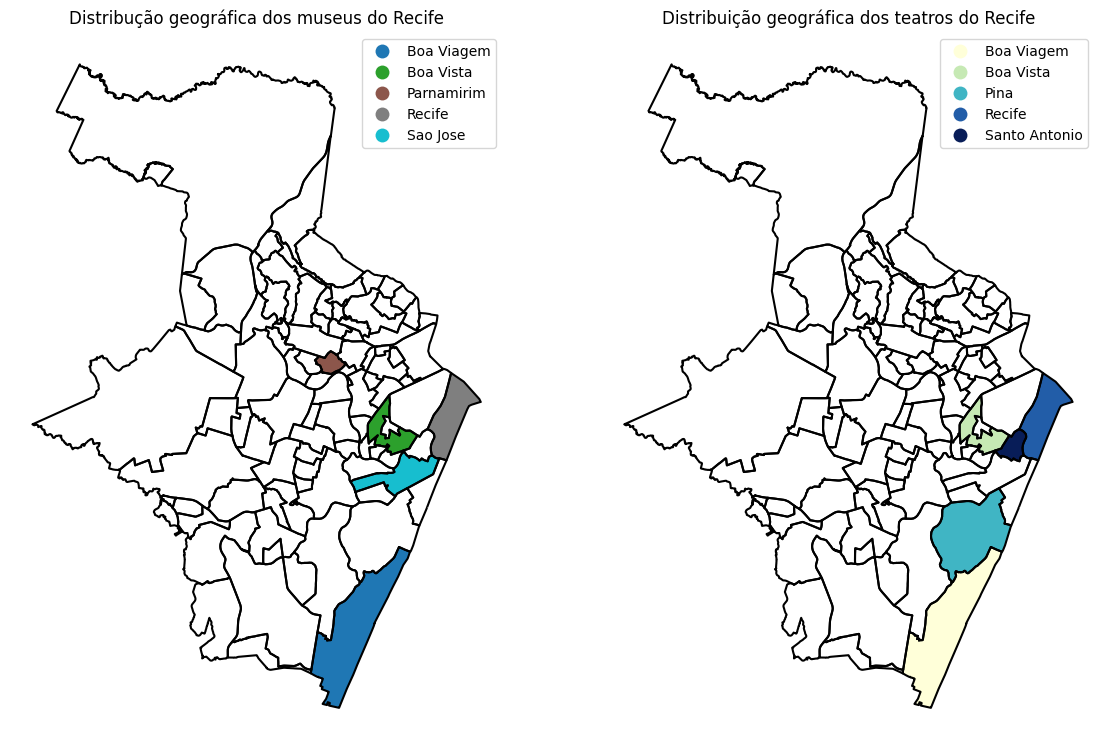

In [59]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 12))
bairro_gdf.plot(ax=ax[0], column='Bairro', legend=True)
gdf.boundary.plot(ax=ax[0], edgecolor='black')
teatro_gdf.plot(ax=ax[1], column='Bairro', legend=True, cmap='YlGnBu')
gdf.boundary.plot(ax=ax[1], edgecolor='black')
ax[0].axis('off')
ax[0].set_title('Distribução geográfica dos museus do Recife')
ax[1].axis('off')
ax[1].set_title('Distribuição geográfica dos teatros do Recife')
plt.show()

### **Evolução do público nos equipamentos culturais do Recife em 2023**

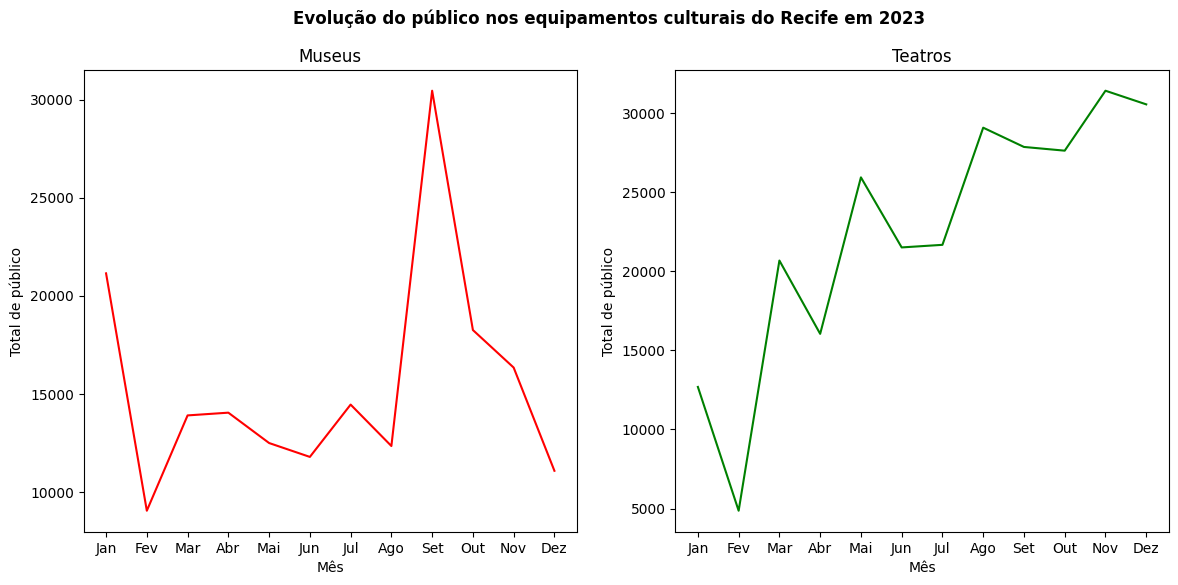

In [60]:
fig1, ax1 = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
ax1[0].plot(meses_columns, sum_pub_museus, color='red')
ax1[0].set_xlabel('Mês')
ax1[0].set_ylabel('Total de público')
ax1[0].set_title('Museus')
ax1[1].plot(meses_columns, sum_pub_teatro, color='green')
ax1[1].set_xlabel('Mês')
ax1[1].set_ylabel('Total de público')
ax1[1].set_title('Teatros')
fig1.suptitle('Evolução do público nos equipamentos culturais do Recife em 2023',
              fontweight='bold')
plt.show()

### **Ranking de público nos museus do Recife por equipamento**

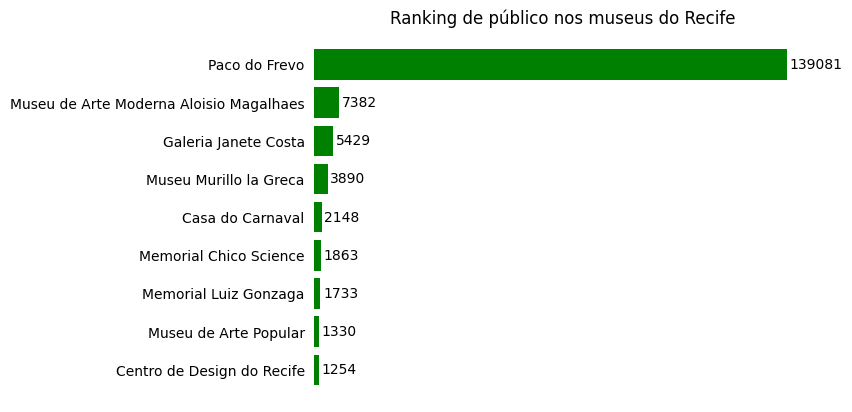

In [61]:
fig2, ax2 = plt.subplots()
ax2.barh(rank_df['Equipamento'], rank_df['Total'], color='green')
ax2.spines.top.set_visible(False)
ax2.spines.right.set_visible(False)
ax2.spines.left.set_visible(False)
ax2.spines.bottom.set_visible(False)
ax2.tick_params(axis='y', left=False)
ax2.set(xticks=[])
for xi, yi, annotation in zip(rank_df['Total'], rank_df['Equipamento'], [f'{el}' for el in rank_df['Total']]):
  ax2.annotate(annotation, xy=(xi,yi), xytext=(2, 0), textcoords='offset points', va='center')
ax2.set_title('Ranking de público nos museus do Recife')
plt.show()

### **Ranking de público nos museus do Recife por bairro**

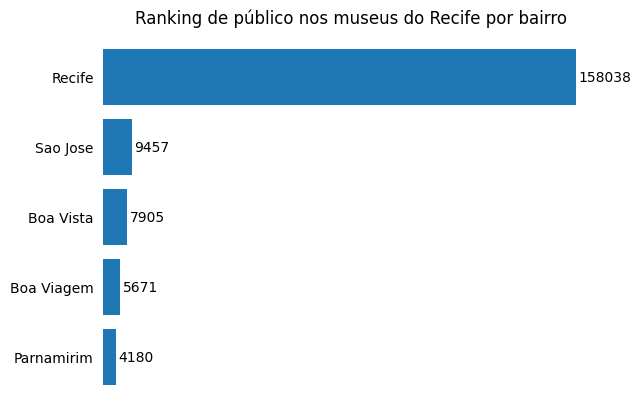

In [62]:
fig3, ax3 = plt.subplots()
ax3.barh(rank_pub_bairro['Bairro'], rank_pub_bairro['Total'])
ax3.spines.top.set_visible(False)
ax3.spines.right.set_visible(False)
ax3.spines.bottom.set_visible(False)
ax3.spines.left.set_visible(False)
ax3.tick_params(axis='y', left=False)
ax3.set(xticks=[])
for wi, zi, annotation in zip(rank_pub_bairro['Total'], rank_pub_bairro['Bairro'], [f'{el}' for el in rank_pub_bairro['Total']]):
  ax3.annotate(annotation, xy=(wi, zi), xytext=(2,0), textcoords='offset points', va='center')
ax3.set_title('Ranking de público nos museus do Recife por bairro')
plt.show()

### **Ranking de público nos teatros do Recife por equipamento**

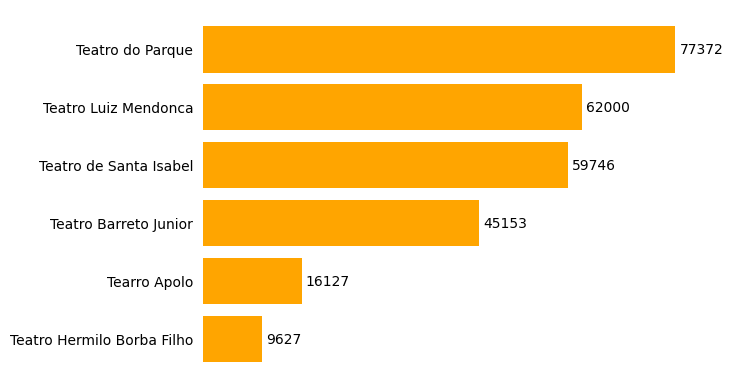

In [63]:
fig5, ax5 = plt.subplots()
ax5.barh(rank_pub_teatro['Equipamento'], rank_pub_teatro['Total'], color='orange')
ax5.spines.top.set_visible(False)
ax5.spines.right.set_visible(False)
ax5.spines.bottom.set_visible(False)
ax5.spines.left.set_visible(False)
ax5.tick_params(axis='y', left=False)
ax5.set(xticks=[])
for xi, yi, annotation in zip(rank_pub_teatro['Total'], rank_pub_teatro['Equipamento'], [f'{el}' for el in rank_pub_teatro['Total']]):
  ax5.annotate(annotation, xy=(xi, yi), xytext=(3, 0), textcoords='offset points', va='center')
plt.show()

### **Ranking de público nos teatros do Recife por bairro**

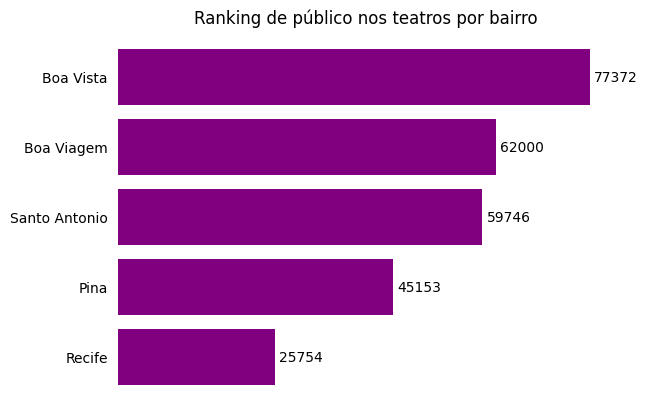

In [64]:
fig6, ax6 = plt.subplots()
ax6.barh(rank_pub_teatro_bairro['Bairro'], rank_pub_teatro_bairro['Total'], color='purple')
ax6.spines.top.set_visible(False)
ax6.spines.right.set_visible(False)
ax6.spines.bottom.set_visible(False)
ax6.spines.left.set_visible(False)
ax6.tick_params(axis='y', left=False)
ax6.set(xticks=[])
for xi, yi, annotation in zip(rank_pub_teatro_bairro['Total'], rank_pub_teatro_bairro['Bairro'], [f'{el}' for el in rank_pub_teatro_bairro['Total']]):
  ax6.annotate(annotation, xy=(xi, yi), xytext=(3, 0), textcoords='offset points', va='center')
ax6.set_title('Ranking de público nos teatros por bairro')
plt.show()

### **Percentual de visitantes aos equipamentos culturais públicos de Recife**

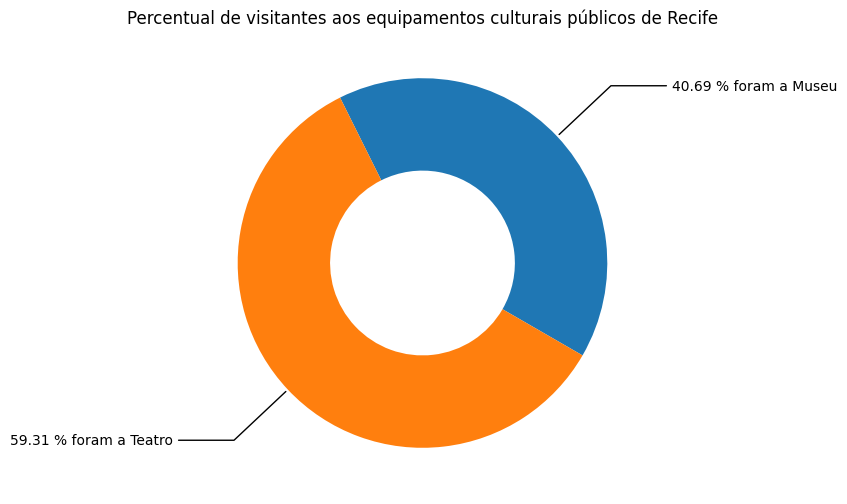

In [65]:
fig7, ax7 = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect='equal'))
wedges, text = ax7.pie(perc_pub_equip, wedgeprops=dict(width=0.5), startangle=-30)
kw = dict(arrowprops=dict(arrowstyle='-'), va='center')

for i, p in enumerate(wedges):
  ang = (p.theta2 - p.theta1)/2. + p.theta1
  y = np.sin(np.deg2rad(ang))
  x = np.cos(np.deg2rad(ang))
  kw['arrowprops'].update({'connectionstyle': f'angle, angleA=0, angleB={ang}'})
  horizontalalignment = {-1: 'right', 1: 'left'}[int(np.sign(x))]
  ax7.annotate(f"{perc_pub_equip[i]} % foram a {df['Tipo'].unique()[i]}",
               xy=(x, y),
               xytext=(1.35*np.sign(x), 1.4*y),
               horizontalalignment=horizontalalignment,
               **kw)
ax7.set_title('Percentual de visitantes aos equipamentos culturais públicos de Recife')
plt.show()

- Refletir sobre os dados